In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [60]:
%matplotlib inline

In [16]:
df = pd.read_csv(r"~\Desktop\Big Data Project\Trending YouTube Video Statistics\US_youtube_trending_data.csv")

In [17]:
df.drop(labels=['video_id', 'title', 'channelId', 'channelTitle', 'tags', 'description', 'comments_disabled', 'ratings_disabled', 'thumbnail_link'], axis=1, inplace=True)

In [18]:
df['trending_date'] = pd.to_datetime(df['trending_date'])

In [19]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

In [20]:
lower_limit = pd.to_datetime('2020-09-01T00:00:00Z')
lower_limit

Timestamp('2020-09-01 00:00:00+0000', tz='UTC')

In [21]:
upper_limit = pd.to_datetime('2021-09-01T00:00:00Z')
upper_limit

Timestamp('2021-09-01 00:00:00+0000', tz='UTC')

In [22]:
df = df[(df['trending_date'] <= upper_limit) & (df['trending_date'] >= lower_limit)]

In [23]:
zero_valued_indices = df[(df["view_count"] == 0) | (df["likes"] == 0) | (df["dislikes"] == 0) | (df["comment_count"] == 0)].index

In [24]:
df.drop(index = zero_valued_indices, inplace=True)

In [25]:
scaler = MinMaxScaler()
scaler.fit(df.iloc[:, 3:7])
df.iloc[:, 3:7] = scaler.transform(df.iloc[:, 3:7])

array([[<AxesSubplot:xlabel='view_count', ylabel='view_count'>,
        <AxesSubplot:xlabel='likes', ylabel='view_count'>,
        <AxesSubplot:xlabel='dislikes', ylabel='view_count'>,
        <AxesSubplot:xlabel='comment_count', ylabel='view_count'>],
       [<AxesSubplot:xlabel='view_count', ylabel='likes'>,
        <AxesSubplot:xlabel='likes', ylabel='likes'>,
        <AxesSubplot:xlabel='dislikes', ylabel='likes'>,
        <AxesSubplot:xlabel='comment_count', ylabel='likes'>],
       [<AxesSubplot:xlabel='view_count', ylabel='dislikes'>,
        <AxesSubplot:xlabel='likes', ylabel='dislikes'>,
        <AxesSubplot:xlabel='dislikes', ylabel='dislikes'>,
        <AxesSubplot:xlabel='comment_count', ylabel='dislikes'>],
       [<AxesSubplot:xlabel='view_count', ylabel='comment_count'>,
        <AxesSubplot:xlabel='likes', ylabel='comment_count'>,
        <AxesSubplot:xlabel='dislikes', ylabel='comment_count'>,
        <AxesSubplot:xlabel='comment_count', ylabel='comment_count'>]],
   

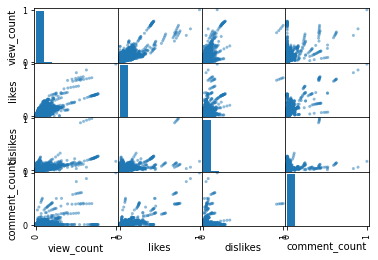

In [62]:
pd.plotting.scatter_matrix(df.iloc[:, 3:7], alpha=0.5)

In [26]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

In [27]:
def calculate_cost(test_record, grouped_mean):
        means = grouped_mean.loc[test_record['clusters']]
        test_record = test_record.iloc[3:7]
        return np.sqrt(np.sum(np.power(means-test_record, 2)))

In [28]:
cost_vals = []
for i in range(1, 25):
    print("Iteration -", i)
    model = KMeans(n_clusters=i, random_state=42)
    model = model.fit(X_train.iloc[:, 3:7])
    train_clusters = X_train.assign(clusters=model.labels_)
    grouped = train_clusters.groupby(by='clusters', as_index=True)
    grouped_mean = grouped.aggregate({'view_count':'mean', 'likes':'mean', 'dislikes':'mean', 'comment_count':'mean'})    
    predicted_clusters = model.predict(X_test.iloc[:, 3:7])
    test_clusters = X_test.assign(clusters=predicted_clusters)
    cost = np.average(test_clusters.apply(calculate_cost, axis=1, args=(grouped_mean,)))
    cost_vals.append(cost)

Iteration - 1
Iteration - 2
Iteration - 3
Iteration - 4
Iteration - 5
Iteration - 6
Iteration - 7
Iteration - 8
Iteration - 9
Iteration - 10
Iteration - 11
Iteration - 12
Iteration - 13
Iteration - 14
Iteration - 15
Iteration - 16
Iteration - 17
Iteration - 18
Iteration - 19
Iteration - 20
Iteration - 21
Iteration - 22
Iteration - 23
Iteration - 24


Text(0, 0.5, 'Cost')

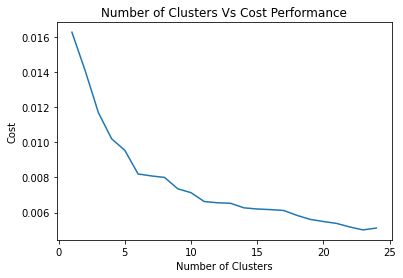

In [29]:
plt.plot(range(1, 25), cost_vals)
plt.title("Number of Clusters Vs Cost Performance")
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")

In [98]:
# Normalize
max_vals = df.iloc[:, 3:7].max()
min_vals = df.iloc[:, 3:7].min()
print(max_vals)
print(min_vals)
norm1 = (X_train.iloc[:, 3:7]-min_vals)/(max_vals-min_vals)
norm1.head()

view_count       264407389
likes             16021534
dislikes            879354
comment_count      6738537
dtype: int64
view_count       38510
likes               17
dislikes             6
comment_count        1
dtype: int64


In [46]:
no_of_clusters = 8
model = KMeans(n_clusters=no_of_clusters, random_state=42)
model = model.fit(X_train.iloc[:, 3:7])
train_clusters = X_train.assign(clusters=model.labels_)

In [52]:
grouped = train_clusters.groupby(by='clusters', as_index=True)
grouped_size = grouped.size()
grouped_mean = grouped.aggregate({'view_count':'mean', 'likes':'mean', 'dislikes':'mean', 'comment_count':'mean'})

In [32]:
predicted_clusters = model.predict(X_test.iloc[:, 3:7])
test_clusters = X_test.assign(clusters=predicted_clusters)
cost = np.average(test_clusters.apply(calculate_cost, axis=1, args=(grouped_mean,)))

In [33]:
cost

0.008000230568467182

In [34]:
grouped_mean

,view_count,likes,dislikes,comment_count
clusters,,,,
0,0.004532,0.003829,0.001382,0.000795
1,0.173307,0.157986,0.062104,0.034893
2,0.221165,0.334589,0.053253,0.300797
3,0.024338,0.022400,0.008266,0.004219
4,0.666418,0.384822,0.217109,0.014330
5,0.549965,0.748826,0.100993,0.595438
6,0.072010,0.073340,0.024988,0.014824
7,0.630259,0.714077,0.961860,0.401215


<AxesSubplot:xlabel='clusters'>

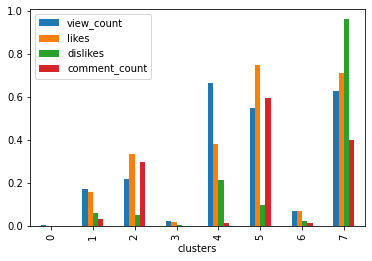

In [38]:
grouped_mean.plot(kind='bar')

In [54]:
grouped_size

clusters
0    48341
1      363
2       35
3     7745
4       32
5       14
6     1531
7        5
dtype: int64

<AxesSubplot:xlabel='clusters'>

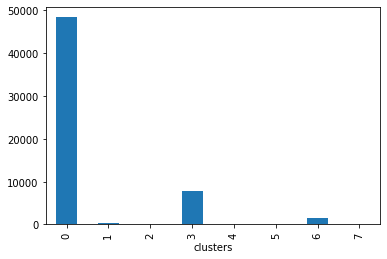

In [55]:
grouped_size.plot(kind='bar')

In [39]:
clustered_df = pd.concat([train_clusters, test_clusters])

In [40]:
clustered_df.shape

(72583, 8)

In [41]:
df.shape

(72583, 7)

In [42]:
cluster_7 = clustered_df[(clustered_df['clusters'] == 7)]

In [43]:
cluster_7.groupby(by='categoryId', as_index=True).size()

categoryId
10    5
dtype: int64

In [64]:
cluster_5 = clustered_df[(clustered_df['clusters'] == 5)]

In [65]:
cluster_5.groupby(by='categoryId', as_index=True).size()

categoryId
10    15
dtype: int64

In [66]:
cluster_4 = clustered_df[(clustered_df['clusters'] == 4)]

In [67]:
cluster_4.groupby(by='categoryId', as_index=True).size()

categoryId
10     3
24    33
dtype: int64

In [68]:
cluster_0_3_6 = clustered_df[(clustered_df['clusters'] == 0) | (clustered_df['clusters'] == 3) | (clustered_df['clusters'] == 6)]

In [69]:
cluster_0_3_6.groupby(by='categoryId', as_index=True).size()

categoryId
1      2778
2      1336
10    13759
15      389
17     8119
19      272
20    11894
22     5938
23     3897
24    14469
25     2469
26     2501
27     1545
28     2602
29       68
dtype: int64

In [44]:
us_categories = pd.read_json(r"~\Desktop\Big Data Project\Trending YouTube Video Statistics\US_category_id.json")
us_categories = pd.json_normalize(us_categories["items"])
us_categories.rename(columns={'snippet.title':'name'}, inplace=True)
us_categories.drop(labels=['kind', 'etag', 'snippet.assignable', 'snippet.channelId'], axis=1, inplace=True)

In [63]:
us_categories

,id,name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs
